
# 0- Packages Import

In [1]:
import pandas as pd  #pandas to read ,write file
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# 1.Business Data Understanding

This step aims to identify:
* Number of variables (Types ,Quality);
* Number of classes ;
* Number of samples.

In [2]:
#read dataset
df=pd.read_csv("Dataset.csv")

In [3]:
#display
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#list of unique value
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

<Axes: xlabel='Loan_Status'>

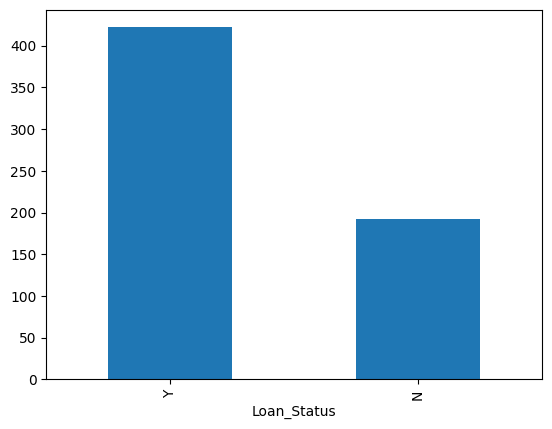

In [6]:
df.Loan_Status.value_counts().plot(kind='bar')

This dataset includes:
* 614 samples
* 11 variables without count of Loan_ID and Loan_Status
* 2 classes Y(422) N(192)

# 2- Data Preparation

This states aims to :
* Data cleaning ;
* Data visualization ;
* Data Normalization;
* Data partioning.

in order to adress the problem of missed values and nan values ,we have to applay data imputation and data incoding


## 2.1. Data imputation

we use fillna() to replace missed values:
* for numerical NAN , we replace it by 0
* for categorial NAN , we use "other"





In [ ]:
df.fillna({'Loan_ID':"other",'Gender':"other",'Married':"other",'Dependents':"other",'Education':"other",'Self_Employed':"other",'Property_Area':"other",'Loan_Status':"other",'CoapplicantIncome':0.0 ,'LoanAmount':0.0,'Loan_Amount_Term':0.0,'Credit_History':0.0,'ApplicantIncome':0},inplace=True)

In [ ]:
df=df.drop('Loan_ID',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## 2.2. Data Analysis


In this step we will answer somes hypotheses :
* H1: which gender is conserned by loan?
* H2: are married people is mapining more loan?
* H3: dependents can effort loan demand?
* H4: does educations has a unspect loan demand?
* H5: emploiment is conected with loan demand ?
* H6: with is more concerned by loan ?

<Axes: xlabel='Gender', ylabel='count'>

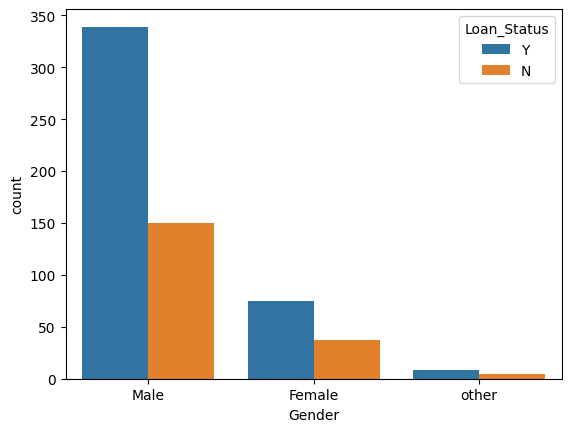

In [ ]:
sns.countplot(data=df,x='Gender',hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

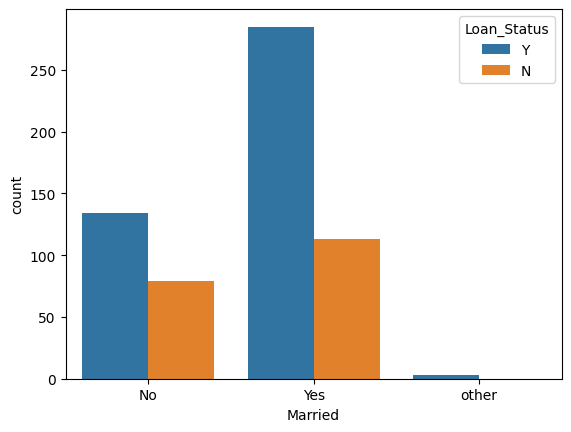

In [ ]:
sns.countplot(data=df,x='Married',hue='Loan_Status')

<Axes: xlabel='Dependents', ylabel='count'>

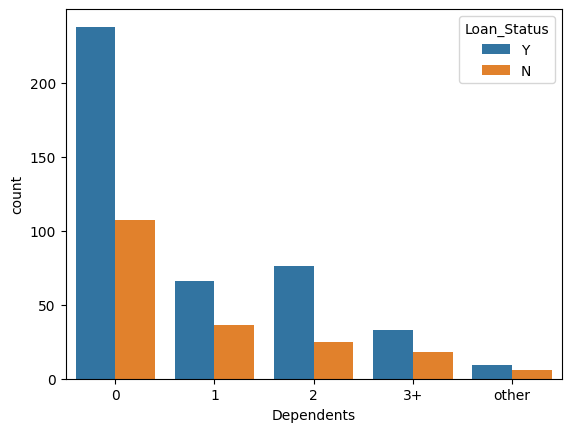

In [ ]:
sns.countplot(data=df,x='Dependents',hue='Loan_Status')

<Axes: xlabel='Education', ylabel='count'>

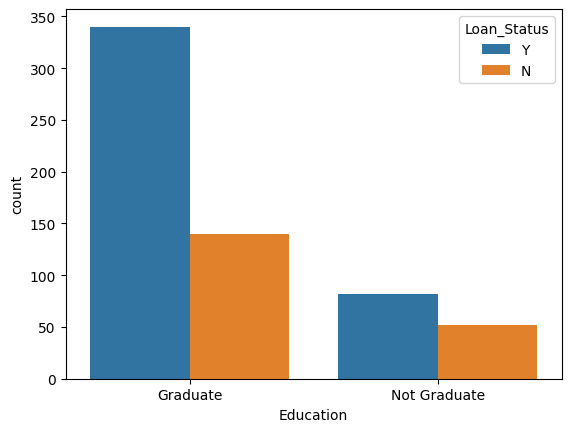

In [ ]:
sns.countplot(data=df,x='Education',hue='Loan_Status')

<Axes: xlabel='Self_Employed', ylabel='count'>

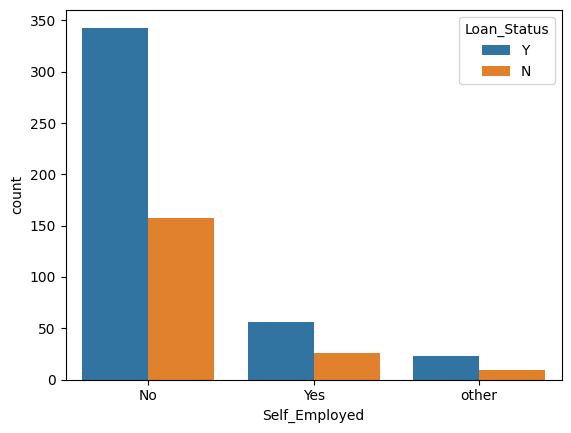

In [ ]:
sns.countplot(data=df,x='Self_Employed',hue='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

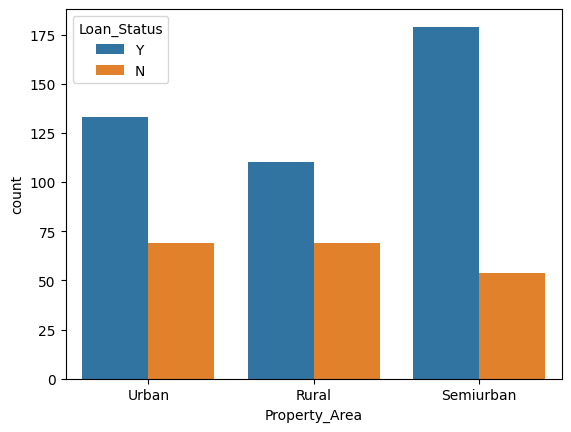

In [ ]:
sns.countplot(data=df,x='Property_Area',hue='Loan_Status')

## 2.3. Data encoding

In [ ]:
#initialisation of label encoders
le=LabelEncoder()
categorical_cols=df.select_dtypes(include=['object'])


In [ ]:
for col in categorical_cols.columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [ ]:
print(df)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

## 2.4. Data Normalization

In [ ]:
x=df.drop('Loan_Status',axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,0.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [ ]:

Scaler=StandardScaler()
x=Scaler.fit_transform(x)
print(x)

[[ 0.38261602 -1.35784704 -0.75205987 ...  0.31416232  0.54095432
   1.22329839]
 [ 0.38261602  0.70581158  0.14110214 ...  0.31416232  0.54095432
  -1.31851281]
 [ 0.38261602  0.70581158 -0.75205987 ...  0.31416232  0.54095432
   1.22329839]
 ...
 [ 0.38261602  0.70581158  0.14110214 ...  0.31416232  0.54095432
   1.22329839]
 [ 0.38261602  0.70581158  1.03426415 ...  0.31416232  0.54095432
   1.22329839]
 [-1.99037625 -1.35784704 -0.75205987 ...  0.31416232 -1.84858491
  -0.04760721]]


## 2.5. Data partionning

In [ ]:
y=df['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# 3.Machine Learning

In [ ]:
neural_model=MLPClassifier(hidden_layer_sizes=(10,10),activation='logistic',solver='adam')
bayes_model=GaussianNB()


* Learning

In [ ]:
neural_model.fit(x_train,y_train)
bayes_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GaussianNB()

* Testing

In [ ]:
y_pred1=neural_model.predict(x_test)
y_pred2=bayes_model.predict(x_test)

# 4. Performance Evaluation

In [ ]:
print(classification_report(y_pred1,y_test))


              precision    recall  f1-score   support

           0       0.14      0.78      0.24         9
           1       0.97      0.62      0.76       114

    accuracy                           0.63       123
   macro avg       0.56      0.70      0.50       123
weighted avg       0.91      0.63      0.72       123



In [ ]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.42      0.68      0.52        31
           1       0.86      0.68      0.76        92

    accuracy                           0.68       123
   macro avg       0.64      0.68      0.64       123
weighted avg       0.75      0.68      0.70       123



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred2))

[[21 29]
 [10 63]]


# 5.Deploiement

In [ ]:
import pickle


In [ ]:
path="bayes_model.pickle"

In [ ]:
pickle.dump(bayes_model,open(path,'wb'))